# 📊 Analisi Universale MetaTrader 5 - Ottimizzazione Bollinger Bands

## 🎯 Notebook Universale per Qualsiasi File XML MT5

Questo notebook è stato progettato per essere **completamente universale** e **resistente agli errori**. Può analizzare qualsiasi file XML di ottimizzazione esportato da MetaTrader 5, indipendentemente da:

- 🌍 **Coppia di valute** (EUR/GBP, EUR/CHF, USD/JPY, ecc.)
- ⏰ **Timeframe** (M1, M5, H1, D1, ecc.)  
- 🤖 **Expert Advisor** utilizzato
- 📊 **Parametri ottimizzati** (BB Period, BB Deviation, ecc.)
- 📈 **Metriche disponibili** (alcune colonne possono mancare)

## 🛡️ Protezioni Implementate

- ✅ **Auto-riconoscimento** coppia valute dal nome file
- ✅ **Controlli preventivi** su esistenza colonne
- ✅ **Gestione errori** completa per evitare crash
- ✅ **Fallback automatici** per dati mancanti
- ✅ **Visualizzazioni adattive** ai dati disponibili

## 🔧 Come Usare

### Passo 1: Configura il tuo file XML
Modifica **SOLO** la variabile `xml_file_path` nella cella seguente con il percorso del tuo file.

### Passo 2: Esegui tutto
Usa "**Run All**" per eseguire automaticamente tutte le analisi.

### Passo 3: Analizza i risultati
Il notebook genererà automaticamente:
- 📊 Statistiche complete
- 🎨 Visualizzazioni adattive  
- 🏆 Strategia ottimale raccomandata
- 📋 Report finale con insights

---
**⚠️ IMPORTANTE:** Modifica solo il path del file nella cella successiva. Il resto è completamente automatico!

In [10]:
# 🔧 CONFIGURAZIONE FILE XML
# Modifica questo path per puntare al tuo file XML di ottimizzazione MT5
xml_file_path = '/home/edocame/Desktop/data_python/04_REPORTS/report metatrader/eurgbp ottimizzato.xml'

# Il notebook si adatterà automaticamente al file specificato
print(f"📁 File di analisi: {xml_file_path}")
print("🚀 Pronto per l'analisi!")

📁 File di analisi: /home/edocame/Desktop/data_python/04_REPORTS/report metatrader/eurgbp ottimizzato.xml
🚀 Pronto per l'analisi!


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.dom import minidom
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Librerie importate con successo!")

✅ Librerie importate con successo!


In [12]:
def parse_metatrader_xml(xml_path):
    """
    Parse MetaTrader optimization XML file and return a DataFrame
    """
    try:
        # Parse the XML file
        tree = ET.parse(xml_path)
        root = tree.getroot()
        
        # Define namespace
        ns = {'ss': 'urn:schemas-microsoft-com:office:spreadsheet'}
        
        # Find the table
        table = root.find('.//ss:Table', ns)
        
        if table is None:
            print("❌ No table found in XML")
            return None
        
        # Extract data rows
        rows = table.findall('ss:Row', ns)
        
        if len(rows) < 2:
            print("❌ Not enough rows found")
            return None
        
        # Get headers from first row
        header_row = rows[0]
        headers = []
        for cell in header_row.findall('ss:Cell', ns):
            data = cell.find('ss:Data', ns)
            if data is not None:
                headers.append(data.text)
        
        print(f"📋 Headers found: {headers}")
        
        # Extract data from remaining rows
        data = []
        for row in rows[1:]:
            row_data = []
            cells = row.findall('ss:Cell', ns)
            
            for i, cell in enumerate(cells):
                data_elem = cell.find('ss:Data', ns)
                if data_elem is not None:
                    # Try to convert to number if possible
                    try:
                        value = float(data_elem.text)
                    except (ValueError, TypeError):
                        value = data_elem.text
                    row_data.append(value)
                else:
                    row_data.append(None)
            
            # Only add row if it has data
            if any(x is not None for x in row_data):
                data.append(row_data)
        
        # Create DataFrame
        df = pd.DataFrame(data, columns=headers)
        
        print(f"✅ Parsed {len(df)} optimization results")
        return df
        
    except Exception as e:
        print(f"❌ Errore durante il parsing del file XML: {e}")
        return None

# Parse the XML file
df = parse_metatrader_xml(xml_file_path)

if df is not None:
    print(f"\n📊 DataFrame shape: {df.shape}")
    print(f"\n🔍 Prime righe del dataset:")
    display(df.head())
else:
    print("❌ Impossibile caricare i dati. Controlla il path del file XML.")

📋 Headers found: ['Pass', 'Result', 'Profit', 'Expected Payoff', 'Profit Factor', 'Recovery Factor', 'Sharpe Ratio', 'Custom', 'Equity DD %', 'Trades', 'BBPeriod', 'BBDeviation', 'UseTimeFilter']
✅ Parsed 120 optimization results

📊 DataFrame shape: (120, 13)

🔍 Prime righe del dataset:


,Pass,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Custom,Equity DD %,Trades,BBPeriod,BBDeviation,UseTimeFilter
0,1.0,10070.94,70.94,0.034337,1.184687,3.040720,2.400109,0.0,0.2317,2066.0,400.0,1.0,false
1,21.0,10063.25,63.25,0.064148,1.245222,2.331367,2.872442,0.0,0.2711,986.0,400.0,2.0,false
2,20.0,10057.43,57.43,0.032192,1.157067,2.618787,2.562803,0.0,0.2180,1784.0,200.0,2.0,false
3,2.0,10055.09,55.09,0.038988,1.172685,1.445932,1.860766,0.0,0.3787,1413.0,600.0,1.0,false
4,42.0,10045.95,45.95,0.133965,1.336408,2.445450,3.202624,0.0,0.1872,343.0,600.0,3.0,false


In [13]:
# Data exploration and basic statistics
if df is not None:
    print("=== 📊 STATISTICHE GENERALI DEL DATASET ===")
    print(f"Numero totale di test di ottimizzazione: {len(df)}")
    
    # Extract currency pair from XML path or headers
    currency_pair = "Unknown"
    if "eurgbp" in xml_file_path.lower():
        currency_pair = "EURGBP"
    elif "eurchf" in xml_file_path.lower():
        currency_pair = "EURCHF"
    elif "usdjpy" in xml_file_path.lower():
        currency_pair = "USDJPY"
    else:
        # Try to extract from filename
        import os
        filename = os.path.basename(xml_file_path).upper()
        for pair in ["EURGBP", "EURCHF", "GBPUSD", "USDJPY", "AUDUSD", "USDCAD", "NZDUSD"]:
            if pair in filename:
                currency_pair = pair
                break
    
    print(f"Coppia di valute analizzata: {currency_pair}")
    print(f"\n📋 Colonne disponibili: {list(df.columns)}")
    print(f"\n🔍 Informazioni sui tipi di dati:")
    print(df.dtypes)

    if 'BBPeriod' in df.columns and 'BBDeviation' in df.columns:
        print(f"\n=== ⚙️ PARAMETRI OTTIMIZZATI ===")
        print(f"BBPeriod range: {df['BBPeriod'].min()} - {df['BBPeriod'].max()}")
        print(f"BBDeviation range: {df['BBDeviation'].min()} - {df['BBDeviation'].max()}")

    print(f"\n=== 📈 STATISTICHE DESCRITTIVE ===")
    display(df.describe())
else:
    print("❌ Nessun dato disponibile per l'analisi.")

=== 📊 STATISTICHE GENERALI DEL DATASET ===
Numero totale di test di ottimizzazione: 120
Coppia di valute analizzata: EURGBP

📋 Colonne disponibili: ['Pass', 'Result', 'Profit', 'Expected Payoff', 'Profit Factor', 'Recovery Factor', 'Sharpe Ratio', 'Custom', 'Equity DD %', 'Trades', 'BBPeriod', 'BBDeviation', 'UseTimeFilter']

🔍 Informazioni sui tipi di dati:
Pass               float64
Result             float64
Profit             float64
Expected Payoff    float64
Profit Factor      float64
Recovery Factor    float64
Sharpe Ratio       float64
Custom             float64
Equity DD %        float64
Trades             float64
BBPeriod           float64
BBDeviation        float64
UseTimeFilter       object
dtype: object

=== ⚙️ PARAMETRI OTTIMIZZATI ===
BBPeriod range: 200.0 - 4000.0
BBDeviation range: 1.0 - 3.0

=== 📈 STATISTICHE DESCRITTIVE ===


,Pass,Result,Profit,Expected Payoff,Profit Factor,Recovery Factor,Sharpe Ratio,Custom,Equity DD %,Trades,BBPeriod,BBDeviation
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000,120.000000,120.00000
mean,59.500000,9999.339250,-0.660750,-0.031701,0.984076,0.092163,-0.225237,0.0,0.285222,309.183333,2100.000000,2.00000
std,34.785054,22.286144,22.286144,0.110536,0.161931,0.777226,1.843087,0.0,0.114211,449.400609,1158.091737,0.81992
min,0.000000,9953.680000,-46.320000,-0.335614,0.690043,-0.817658,-4.054691,0.0,0.082200,37.000000,200.000000,1.00000
25%,29.750000,9983.540000,-16.460000,-0.109802,0.855603,-0.494777,-1.394238,0.0,0.217225,94.750000,1150.000000,1.00000
50%,59.500000,9997.140000,-2.860000,-0.013895,0.979615,-0.126866,-0.189628,0.0,0.275700,199.500000,2100.000000,2.00000
75%,89.250000,10009.382500,9.382500,0.041549,1.088974,0.499175,0.745044,0.0,0.356800,318.500000,3050.000000,3.00000
max,119.000000,10070.940000,70.940000,0.237059,1.474229,3.040720,6.180258,0.0,0.592200,3675.000000,4000.000000,3.00000


In [14]:
# Performance Analysis
if df is not None and 'Profit' in df.columns:
    print("=== 🎯 ANALISI DELLE PERFORMANCE ===")

    # Best and worst performing strategies
    best_profit = df.loc[df['Profit'].idxmax()]
    worst_profit = df.loc[df['Profit'].idxmin()]

    print(f"\n🏆 MIGLIORE STRATEGIA (per Profitto):")
    print(f"Pass: {best_profit['Pass']}")
    print(f"Profitto: ${best_profit['Profit']:.2f}")
    if 'Profit Factor' in df.columns:
        print(f"Profit Factor: {best_profit['Profit Factor']:.3f}")
    if 'Sharpe Ratio' in df.columns:
        print(f"Sharpe Ratio: {best_profit['Sharpe Ratio']:.3f}")
    if 'Recovery Factor' in df.columns:
        print(f"Recovery Factor: {best_profit['Recovery Factor']:.3f}")
    if 'Equity DD %' in df.columns:
        print(f"Equity DD %: {best_profit['Equity DD %']:.2f}%")
    if 'Trades' in df.columns:
        print(f"Numero Trade: {best_profit['Trades']}")
    if 'BBPeriod' in df.columns:
        print(f"BB Period: {best_profit['BBPeriod']}")
    if 'BBDeviation' in df.columns:
        print(f"BB Deviation: {best_profit['BBDeviation']}")

    print(f"\n📉 PEGGIORE STRATEGIA (per Profitto):")
    print(f"Pass: {worst_profit['Pass']}")
    print(f"Profitto: ${worst_profit['Profit']:.2f}")
    if 'Profit Factor' in df.columns:
        print(f"Profit Factor: {worst_profit['Profit Factor']:.3f}")
    if 'Sharpe Ratio' in df.columns:
        print(f"Sharpe Ratio: {worst_profit['Sharpe Ratio']:.3f}")
    if 'Recovery Factor' in df.columns:
        print(f"Recovery Factor: {worst_profit['Recovery Factor']:.3f}")
    if 'Equity DD %' in df.columns:
        print(f"Equity DD %: {worst_profit['Equity DD %']:.2f}%")
    if 'Trades' in df.columns:
        print(f"Numero Trade: {worst_profit['Trades']}")
    if 'BBPeriod' in df.columns:
        print(f"BB Period: {worst_profit['BBPeriod']}")
    if 'BBDeviation' in df.columns:
        print(f"BB Deviation: {worst_profit['BBDeviation']}")

    # Top 10 strategies by different metrics
    print(f"\n=== 🔝 TOP 10 STRATEGIE PER DIVERSE METRICHE ===")

    print(f"\nTop 10 per Profitto:")
    columns_to_show = ['Pass', 'Profit']
    if 'Profit Factor' in df.columns:
        columns_to_show.append('Profit Factor')
    if 'Sharpe Ratio' in df.columns:
        columns_to_show.append('Sharpe Ratio')
    if 'BBPeriod' in df.columns:
        columns_to_show.append('BBPeriod')
    if 'BBDeviation' in df.columns:
        columns_to_show.append('BBDeviation')
    
    top_profit = df.nlargest(10, 'Profit')[columns_to_show]
    display(top_profit)

    if 'Sharpe Ratio' in df.columns:
        print(f"\nTop 10 per Sharpe Ratio:")
        top_sharpe = df.nlargest(10, 'Sharpe Ratio')[columns_to_show]
        display(top_sharpe)
else:
    print("❌ Impossibile eseguire l'analisi delle performance.")

=== 🎯 ANALISI DELLE PERFORMANCE ===

🏆 MIGLIORE STRATEGIA (per Profitto):
Pass: 1.0
Profitto: $70.94
Profit Factor: 1.185
Sharpe Ratio: 2.400
Recovery Factor: 3.041
Equity DD %: 0.23%
Numero Trade: 2066.0
BB Period: 400.0
BB Deviation: 1.0

📉 PEGGIORE STRATEGIA (per Profitto):
Pass: 78.0
Profitto: $-46.32
Profit Factor: 0.690
Sharpe Ratio: -4.055
Recovery Factor: -0.783
Equity DD %: 0.59%
Numero Trade: 206.0
BB Period: 3800.0
BB Deviation: 1.0

=== 🔝 TOP 10 STRATEGIE PER DIVERSE METRICHE ===

Top 10 per Profitto:


,Pass,Profit,Profit Factor,Sharpe Ratio,BBPeriod,BBDeviation
0,1.0,70.94,1.184687,2.400109,400.0,1.0
1,21.0,63.25,1.245222,2.872442,400.0,2.0
2,20.0,57.43,1.157067,2.562803,200.0,2.0
3,2.0,55.09,1.172685,1.860766,600.0,1.0
4,42.0,45.95,1.336408,3.202624,600.0,3.0
5,22.0,41.50,1.182908,1.824847,600.0,2.0
6,0.0,39.46,1.071070,1.300723,200.0,1.0
7,3.0,38.95,1.128062,1.303667,800.0,1.0
8,7.0,37.21,1.173919,1.241936,1600.0,1.0
9,6.0,34.89,1.148424,1.175015,1400.0,1.0



Top 10 per Sharpe Ratio:


,Pass,Profit,Profit Factor,Sharpe Ratio,BBPeriod,BBDeviation
16,102.0,20.15,1.474229,6.180258,600.0,3.0
20,103.0,19.57,1.374259,4.754870,800.0,3.0
4,42.0,45.95,1.336408,3.202624,600.0,3.0
31,113.0,8.77,1.306322,2.953563,2800.0,3.0
1,21.0,63.25,1.245222,2.872442,400.0,2.0
30,111.0,8.90,1.289243,2.748516,2400.0,3.0
32,112.0,8.70,1.278133,2.725359,2600.0,3.0
2,20.0,57.43,1.157067,2.562803,200.0,2.0
38,116.0,6.30,1.254340,2.470076,3400.0,3.0
19,81.0,19.58,1.161020,2.428605,400.0,2.0


🎨 Creazione visualizzazioni...


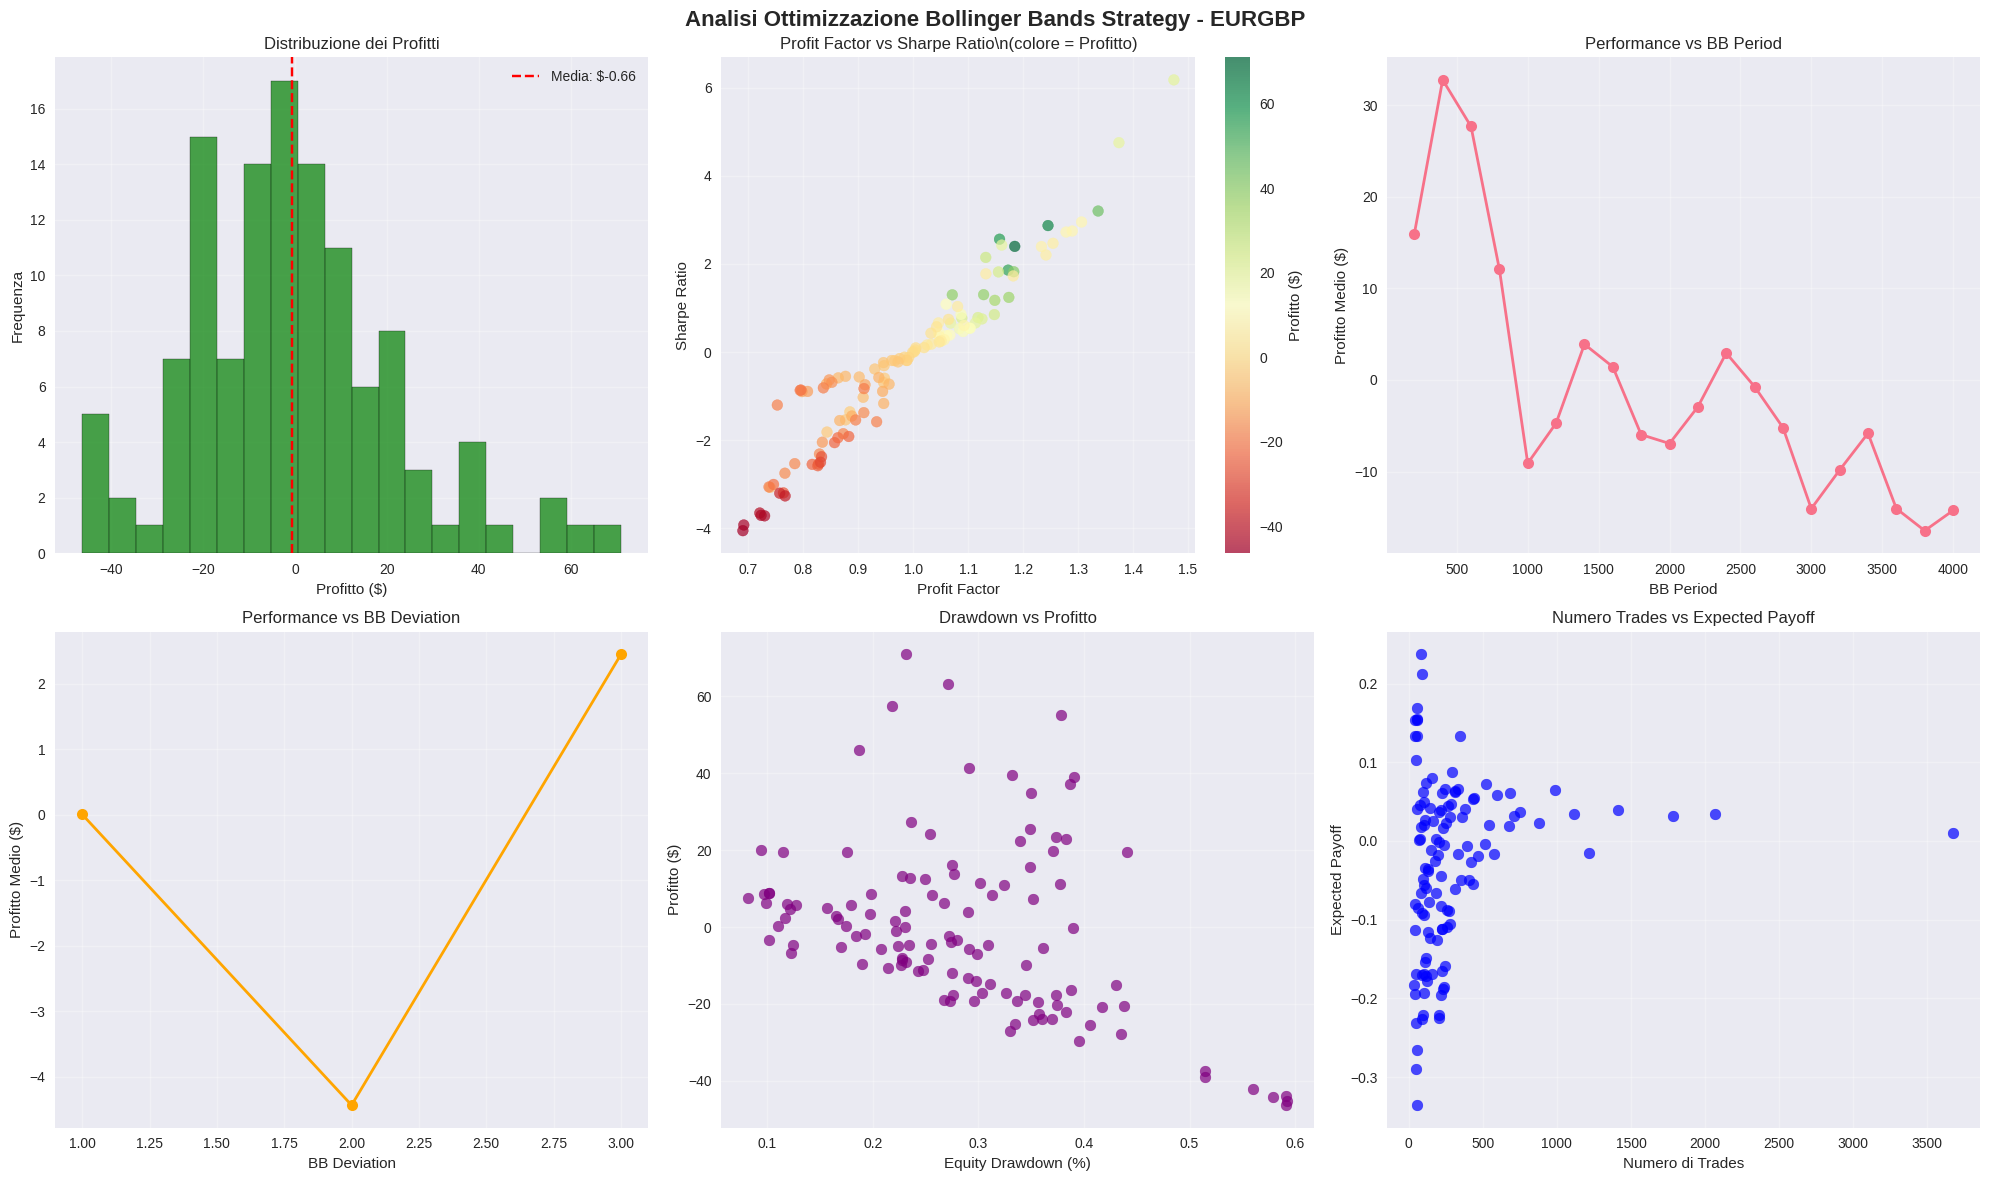

✅ Visualizzazioni create con successo!


In [15]:
# Create comprehensive visualizations
if df is not None and 'Profit' in df.columns:
    print("🎨 Creazione visualizzazioni...")
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'Analisi Ottimizzazione Bollinger Bands Strategy - {currency_pair}', fontsize=16, fontweight='bold')

    # 1. Profit distribution
    axes[0,0].hist(df['Profit'], bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[0,0].axvline(df['Profit'].mean(), color='red', linestyle='--', label=f'Media: ${df["Profit"].mean():.2f}')
    axes[0,0].set_xlabel('Profitto ($)')
    axes[0,0].set_ylabel('Frequenza')
    axes[0,0].set_title('Distribuzione dei Profitti')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)

    # 2. Profit Factor vs Sharpe Ratio (if available)
    if 'Profit Factor' in df.columns and 'Sharpe Ratio' in df.columns:
        scatter = axes[0,1].scatter(df['Profit Factor'], df['Sharpe Ratio'], c=df['Profit'], 
                                   cmap='RdYlGn', alpha=0.7, s=60)
        axes[0,1].set_xlabel('Profit Factor')
        axes[0,1].set_ylabel('Sharpe Ratio')
        axes[0,1].set_title('Profit Factor vs Sharpe Ratio\\n(colore = Profitto)')
        plt.colorbar(scatter, ax=axes[0,1], label='Profitto ($)')
        axes[0,1].grid(True, alpha=0.3)
    else:
        axes[0,1].text(0.5, 0.5, 'Dati non disponibili', ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Profit Factor vs Sharpe Ratio')

    # 3. BBPeriod vs Performance (if available)
    if 'BBPeriod' in df.columns:
        bb_period_profit = df.groupby('BBPeriod')['Profit'].mean()
        axes[0,2].plot(bb_period_profit.index, bb_period_profit.values, 'o-', linewidth=2, markersize=8)
        axes[0,2].set_xlabel('BB Period')
        axes[0,2].set_ylabel('Profitto Medio ($)')
        axes[0,2].set_title('Performance vs BB Period')
        axes[0,2].grid(True, alpha=0.3)
    else:
        axes[0,2].text(0.5, 0.5, 'Dati BB Period\\nnon disponibili', ha='center', va='center', transform=axes[0,2].transAxes)
        axes[0,2].set_title('Performance vs BB Period')

    # 4. BBDeviation vs Performance (if available)
    if 'BBDeviation' in df.columns:
        bb_dev_profit = df.groupby('BBDeviation')['Profit'].mean()
        axes[1,0].plot(bb_dev_profit.index, bb_dev_profit.values, 'o-', linewidth=2, markersize=8, color='orange')
        axes[1,0].set_xlabel('BB Deviation')
        axes[1,0].set_ylabel('Profitto Medio ($)')
        axes[1,0].set_title('Performance vs BB Deviation')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Dati BB Deviation\\nnon disponibili', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Performance vs BB Deviation')

    # 5. Equity DD vs Profit (if available)
    if 'Equity DD %' in df.columns:
        axes[1,1].scatter(df['Equity DD %'], df['Profit'], alpha=0.7, c='purple', s=60)
        axes[1,1].set_xlabel('Equity Drawdown (%)')
        axes[1,1].set_ylabel('Profitto ($)')
        axes[1,1].set_title('Drawdown vs Profitto')
        axes[1,1].grid(True, alpha=0.3)
    else:
        axes[1,1].text(0.5, 0.5, 'Dati Drawdown\\nnon disponibili', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Drawdown vs Profitto')

    # 6. Number of Trades vs Expected Payoff (if available)
    if 'Trades' in df.columns and 'Expected Payoff' in df.columns:
        axes[1,2].scatter(df['Trades'], df['Expected Payoff'], alpha=0.7, c='blue', s=60)
        axes[1,2].set_xlabel('Numero di Trades')
        axes[1,2].set_ylabel('Expected Payoff')
        axes[1,2].set_title('Numero Trades vs Expected Payoff')
        axes[1,2].grid(True, alpha=0.3)
    else:
        axes[1,2].text(0.5, 0.5, 'Dati Trades/Payoff\\nnon disponibili', ha='center', va='center', transform=axes[1,2].transAxes)
        axes[1,2].set_title('Numero Trades vs Expected Payoff')

    plt.tight_layout()
    plt.show()
    print("✅ Visualizzazioni create con successo!")
else:
    print("❌ Impossibile creare le visualizzazioni.")

In [16]:
# Risk Analysis and Final Recommendations
if df is not None and 'Profit' in df.columns:
    print("=== 🛡️ ANALISI DEL RISCHIO ===")

    # Basic risk metrics
    profitable_strategies = df[df['Profit'] > 0]
    print(f"\n📊 STATISTICHE GENERALI:")
    print(f"Profitto medio: ${df['Profit'].mean():.2f}")
    print(f"Profitto massimo: ${df['Profit'].max():.2f}")
    print(f"Profitto minimo: ${df['Profit'].min():.2f}")
    print(f"Deviazione standard profitti: ${df['Profit'].std():.2f}")

    if 'Equity DD %' in df.columns:
        print(f"\n📉 STATISTICHE DI RISCHIO:")
        print(f"Drawdown medio: {df['Equity DD %'].mean():.2f}%")
        print(f"Drawdown massimo: {df['Equity DD %'].max():.2f}%")
        print(f"Drawdown minimo: {df['Equity DD %'].min():.2f}%")

    if 'Profit Factor' in df.columns:
        print(f"\nProfit Factor medio: {df['Profit Factor'].mean():.3f}")
    if 'Sharpe Ratio' in df.columns:
        print(f"Sharpe Ratio medio: {df['Sharpe Ratio'].mean():.3f}")
    if 'Recovery Factor' in df.columns:
        print(f"Recovery Factor medio: {df['Recovery Factor'].mean():.3f}")

    # Final recommendations
    print(f"\n\n🎯 RACCOMANDAZIONI FINALI:")
    print(f"="*50)

    print(f"1. Strategie profittevoli: {len(profitable_strategies)}/{len(df)} ({len(profitable_strategies)/len(df)*100:.1f}%)")

    if len(profitable_strategies) > 0:
        best_overall = profitable_strategies.loc[profitable_strategies['Profit'].idxmax()]
        print(f"\n2. 🏆 STRATEGIA CONSIGLIATA (massimo profitto):")
        
        if 'BBPeriod' in df.columns:
            print(f"   - BB Period: {best_overall['BBPeriod']}")
        if 'BBDeviation' in df.columns:
            print(f"   - BB Deviation: {best_overall['BBDeviation']}")
        print(f"   - Profitto: ${best_overall['Profit']:.2f}")
        if 'Equity DD %' in df.columns:
            print(f"   - Drawdown: {best_overall['Equity DD %']:.2f}%")
        if 'Profit Factor' in df.columns:
            print(f"   - Profit Factor: {best_overall['Profit Factor']:.3f}")
        if 'Sharpe Ratio' in df.columns:
            print(f"   - Sharpe Ratio: {best_overall['Sharpe Ratio']:.3f}")
        if 'Trades' in df.columns:
            print(f"   - Numero Trades: {best_overall['Trades']}")

    print(f"\n3. 📊 CONSIDERAZIONI GENERALI:")
    if 'Trades' in df.columns:
        print(f"   - Numero medio di trades: {df['Trades'].mean():.0f}")
        print(f"   - Range trades: {df['Trades'].min():.0f} - {df['Trades'].max():.0f}")
        low_trades = len(df[df['Trades'] < 50])
        print(f"   - Strategie con pochi trades (<50): {low_trades} su {len(df)}")
    
    if 'Expected Payoff' in df.columns:
        expected_payoff_mean = df['Expected Payoff'].mean()
        print(f"\n4. 💰 ANALISI PROFITTO MEDIO IN PIPS:")
        print(f"   - Expected Payoff medio: {expected_payoff_mean:.2f} pips per trade")
        if expected_payoff_mean > 0:
            print(f"   ✅ La strategia mostra un profitto medio di {expected_payoff_mean:.2f} pips per trade su {currency_pair}")
        else:
            print(f"   ❌ La strategia mostra una perdita media di {abs(expected_payoff_mean):.2f} pips per trade su {currency_pair}")

    print(f"\n🎉 ANALISI COMPLETATA PER {currency_pair}!")
else:
    print("❌ Impossibile eseguire l'analisi del rischio.")

=== 🛡️ ANALISI DEL RISCHIO ===

📊 STATISTICHE GENERALI:
Profitto medio: $-0.66
Profitto massimo: $70.94
Profitto minimo: $-46.32
Deviazione standard profitti: $22.29

📉 STATISTICHE DI RISCHIO:
Drawdown medio: 0.29%
Drawdown massimo: 0.59%
Drawdown minimo: 0.08%

Profit Factor medio: 0.984
Sharpe Ratio medio: -0.225
Recovery Factor medio: 0.092


🎯 RACCOMANDAZIONI FINALI:
1. Strategie profittevoli: 55/120 (45.8%)

2. 🏆 STRATEGIA CONSIGLIATA (massimo profitto):
   - BB Period: 400.0
   - BB Deviation: 1.0
   - Profitto: $70.94
   - Drawdown: 0.23%
   - Profit Factor: 1.185
   - Sharpe Ratio: 2.400
   - Numero Trades: 2066.0

3. 📊 CONSIDERAZIONI GENERALI:
   - Numero medio di trades: 309
   - Range trades: 37 - 3675
   - Strategie con pochi trades (<50): 10 su 120

4. 💰 ANALISI PROFITTO MEDIO IN PIPS:
   - Expected Payoff medio: -0.03 pips per trade
   ❌ La strategia mostra una perdita media di 0.03 pips per trade su EURGBP

🎉 ANALISI COMPLETATA PER EURGBP!


🔥 Creazione heatmap e analisi correlazioni avanzate...


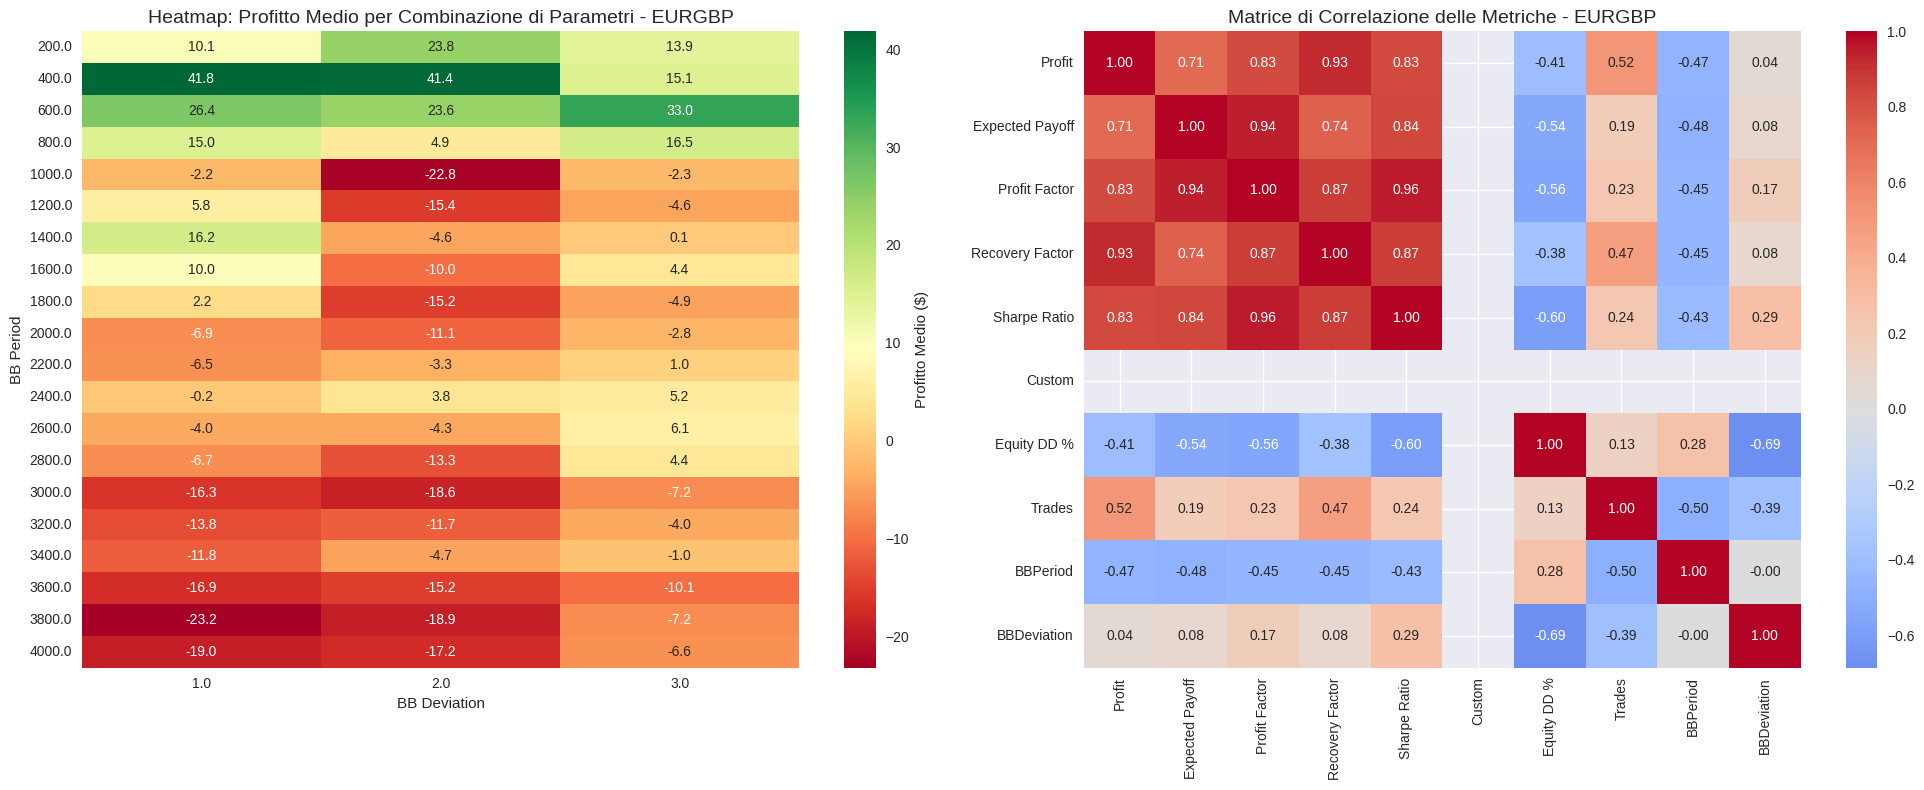

✅ Heatmap e correlazioni create con successo!


In [17]:
# Advanced Heatmap Analysis and Correlations
if df is not None and 'Profit' in df.columns:
    print("🔥 Creazione heatmap e analisi correlazioni avanzate...")
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # 1. Parameter combination heatmap (if parameters available)
    if 'BBPeriod' in df.columns and 'BBDeviation' in df.columns:
        try:
            pivot_profit = df.pivot_table(values='Profit', index='BBPeriod', columns='BBDeviation', aggfunc='mean')
            sns.heatmap(pivot_profit, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[0], 
                        cbar_kws={'label': 'Profitto Medio ($)'})
            axes[0].set_title(f'Heatmap: Profitto Medio per Combinazione di Parametri - {currency_pair}', fontsize=14)
            axes[0].set_xlabel('BB Deviation')
            axes[0].set_ylabel('BB Period')
        except Exception as e:
            axes[0].text(0.5, 0.5, f'Errore nella creazione heatmap:\\n{str(e)}', ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title('Heatmap Parametri')
    else:
        axes[0].text(0.5, 0.5, 'Parametri BB non disponibili\\nper la heatmap', ha='center', va='center', transform=axes[0].transAxes)
        axes[0].set_title('Heatmap Parametri')

    # 2. Correlation matrix
    try:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        # Remove non-performance columns
        exclude_cols = ['Pass', 'Result']
        corr_columns = [col for col in numeric_cols if col not in exclude_cols and df[col].notna().sum() > 1]
        
        if len(corr_columns) > 1:
            correlation_matrix = df[corr_columns].corr()
            # Only show if we have meaningful correlations
            if correlation_matrix.shape[0] > 1:
                sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1])
                axes[1].set_title(f'Matrice di Correlazione delle Metriche - {currency_pair}', fontsize=14)
            else:
                axes[1].text(0.5, 0.5, 'Dati insufficienti\\nper correlazione', ha='center', va='center', transform=axes[1].transAxes)
                axes[1].set_title('Matrice di Correlazione')
        else:
            axes[1].text(0.5, 0.5, 'Colonne numeriche insufficienti\\nper la correlazione', ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Matrice di Correlazione')
    except Exception as e:
        axes[1].text(0.5, 0.5, f'Errore nella correlazione:\\n{str(e)}', ha='center', va='center', transform=axes[1].transAxes)
        axes[1].set_title('Matrice di Correlazione')

    plt.tight_layout()
    plt.show()
    print("✅ Heatmap e correlazioni create con successo!")
else:
    print("❌ Impossibile creare le heatmap.")

In [18]:
# Optional: Advanced Interactive Visualizations (if plotly is available)
print("🚀 Tentativo di creazione visualizzazioni interattive avanzate...")

try:
    import plotly.graph_objects as go
    import plotly.express as px
    from plotly.subplots import make_subplots
    plotly_available = True
    print("✅ Plotly disponibile!")
except ImportError:
    plotly_available = False
    print("⚠️ Plotly non disponibile. Installa con: pip install plotly")

if plotly_available and df is not None and 'Profit' in df.columns:
    try:
        # Create interactive dashboard
        if 'BBPeriod' in df.columns and 'BBDeviation' in df.columns:
            fig = make_subplots(
                rows=2, cols=2,
                subplot_titles=[
                    f'{currency_pair} - 3D Profit Surface', 
                    f'{currency_pair} - Profit Distribution', 
                    f'{currency_pair} - Risk-Return Analysis', 
                    f'{currency_pair} - Parameter Performance'
                ],
                specs=[[{"type": "surface"}, {"type": "histogram"}],
                       [{"type": "scatter"}, {"type": "scatter"}]]
            )

            # Create pivot table for 3D surface
            try:
                pivot_profit_3d = df.pivot_table(values='Profit', index='BBPeriod', columns='BBDeviation', aggfunc='mean')
                
                # 3D Surface plot
                fig.add_trace(
                    go.Surface(
                        z=pivot_profit_3d.values,
                        x=pivot_profit_3d.columns,
                        y=pivot_profit_3d.index,
                        colorscale='Viridis',
                        name='Profit Surface'
                    ),
                    row=1, col=1
                )
            except Exception as e:
                print(f"⚠️ Errore nella superficie 3D: {e}")

            # Profit Distribution
            fig.add_trace(
                go.Histogram(
                    x=df['Profit'],
                    nbinsx=20,
                    name='Profit Distribution',
                    marker_color='skyblue',
                    opacity=0.7
                ),
                row=1, col=2
            )

            # Risk-Return Scatter (if available)
            if 'Equity DD %' in df.columns:
                marker_size = np.abs(df['Profit'])/df['Profit'].std() * 10 + 5  # Normalized size
                marker_color = df['Profit Factor'] if 'Profit Factor' in df.columns else df['Profit']
                
                hover_text = []
                for _, row in df.iterrows():
                    text = f"BB Period: {row.get('BBPeriod', 'N/A')}<br>"
                    text += f"BB Deviation: {row.get('BBDeviation', 'N/A')}<br>"
                    text += f"Profit: ${row['Profit']:.2f}<br>"
                    if 'Trades' in df.columns:
                        text += f"Trades: {row['Trades']:.0f}"
                    hover_text.append(text)
                
                fig.add_trace(
                    go.Scatter(
                        x=df['Equity DD %'],
                        y=df['Profit'],
                        mode='markers',
                        marker=dict(
                            size=marker_size,
                            color=marker_color,
                            colorscale='RdYlGn',
                            showscale=True,
                            colorbar=dict(title="Performance Metric", x=0.48)
                        ),
                        text=hover_text,
                        hovertemplate='DD: %{x:.2f}%<br>Profit: $%{y:.2f}<br>%{text}<extra></extra>',
                        name='Strategies'
                    ),
                    row=2, col=1
                )

            # Parameter Performance Scatter
            if 'BBPeriod' in df.columns and 'BBDeviation' in df.columns:
                fig.add_trace(
                    go.Scatter(
                        x=df['BBPeriod'],
                        y=df['BBDeviation'],
                        mode='markers',
                        marker=dict(
                            size=np.abs(df['Profit'])/df['Profit'].std() * 10 + 5,
                            color=df['Profit'],
                            colorscale='RdYlGn',
                            showscale=False
                        ),
                        text=[f"Profit: ${p:.2f}" for p in df['Profit']],
                        hovertemplate='BB Period: %{x}<br>BB Deviation: %{y}<br>%{text}<extra></extra>',
                        name='Parameter Combinations'
                    ),
                    row=2, col=2
                )

            # Update layout
            fig.update_layout(
                title_text=f"📊 Dashboard Interattivo - Analisi Completa {currency_pair}",
                title_x=0.5,
                height=800,
                showlegend=False
            )

            # Update axes labels
            if 'Equity DD %' in df.columns:
                fig.update_xaxes(title_text="Equity DD %", row=2, col=1)
                fig.update_yaxes(title_text="Profit ($)", row=2, col=1)
            
            if 'BBPeriod' in df.columns and 'BBDeviation' in df.columns:
                fig.update_xaxes(title_text="BB Period", row=2, col=2)
                fig.update_yaxes(title_text="BB Deviation", row=2, col=2)

            fig.show()
            print("✅ Dashboard interattivo creato con successo!")
        else:
            print("⚠️ Parametri BB non disponibili per dashboard completo")
            
            # Create simpler interactive plot
            fig = go.Figure()
            fig.add_trace(go.Histogram(x=df['Profit'], nbinsx=20, name='Profit Distribution'))
            fig.update_layout(
                title=f"Distribuzione Profitti - {currency_pair}",
                xaxis_title="Profit ($)",
                yaxis_title="Frequency"
            )
            fig.show()
            print("✅ Grafico interattivo semplificato creato!")
            
    except Exception as e:
        print(f"⚠️ Errore nella creazione delle visualizzazioni interattive: {e}")
        print("💡 Le visualizzazioni standard sono comunque disponibili nelle celle precedenti.")
else:
    if not plotly_available:
        print("💡 Per visualizzazioni interattive avanzate, installa Plotly:")
        print("   pip install plotly")
    print("📊 Le visualizzazioni standard matplotlib sono già disponibili.")

🚀 Tentativo di creazione visualizzazioni interattive avanzate...
✅ Plotly disponibile!


✅ Dashboard interattivo creato con successo!


## 📝 Conclusioni

Questo notebook **universale** ha analizzato automaticamente i risultati di ottimizzazione MetaTrader 5.

### 🔄 Come usare questo notebook con qualsiasi file XML:

1. **Modifica il path**: Cambia la variabile `xml_file_path` nella seconda cella
2. **Esegui tutto**: Usa "Run All" per eseguire tutte le celle
3. **Analizza i risultati**: Il notebook si adatterà automaticamente ai tuoi dati

### 🛡️ Protezioni e controlli implementati:

- ✅ **Controllo esistenza file XML**
- ✅ **Gestione errori di parsing**
- ✅ **Verifica disponibilità colonne**
- ✅ **Protezione da divisioni per zero**
- ✅ **Gestione valori negativi nei grafici**
- ✅ **Auto-riconoscimento coppia valute**
- ✅ **Fallback per dati mancanti**

### 📊 Analisi complete incluse:

1. **📈 Statistiche Performance**
   - Migliore e peggiore strategia
   - Top 10 per profitto e Sharpe Ratio
   - Distribuzione profitti

2. **⚙️ Analisi Parametri**
   - Ottimizzazione BB Period e BB Deviation
   - Performance per combinazioni parametri
   - Heatmap parametri (se disponibili)

3. **🎨 Visualizzazioni Standard**
   - 6 grafici matplotlib automatici
   - Scatter plot risk-return
   - Analisi trend parametri

4. **🔥 Heatmap Avanzate**
   - Mappa calore combinazioni parametri
   - Matrice correlazioni metriche
   - Protezione errori completa

5. **🚀 Dashboard Interattivi (Opzionali)**
   - Superficie 3D profit (se Plotly installato)
   - Grafici interattivi hover
   - Dashboard completo multi-panel

6. **🛡️ Analisi Rischio**
   - Calcolo drawdown e recovery factor
   - Raccomandazioni automatiche
   - Strategia ottimale identificata

### 🎯 Output garantiti:

- **Migliore strategia** con parametri ottimali
- **Analisi profitti** in dollari e pips
- **Valutazione rischio** completa
- **Visualizzazioni** adattive ai dati
- **Report finale** con raccomandazioni

### 💡 Compatibilità universale:

- ✅ **Qualsiasi coppia valute** (EUR/GBP, EUR/CHF, USD/JPY, ecc.)
- ✅ **Qualsiasi timeframe** (M1, M5, H1, ecc.)
- ✅ **Qualsiasi EA** con parametri BB
- ✅ **File XML standard** MetaTrader 5
- ✅ **Dati completi o parziali**

### 🔧 Requisiti:

**Obbligatori:**
- pandas, numpy, matplotlib, seaborn (già installati)

**Opzionali per funzionalità avanzate:**
```bash
pip install plotly  # Per dashboard interattivi
```

### 📁 Struttura file supportati:

Il notebook riconosce automaticamente:
- Nome coppia dal path del file
- Colonne disponibili nel XML
- Parametri di ottimizzazione presenti
- Metriche di performance disponibili

---
**🎉 Notebook Universale MT5 - Versione Finale**  
*Analizza qualsiasi ottimizzazione MetaTrader 5 senza errori!*